# EDA (Exploratory Data Analysis) 

Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación del conjunto de datos consolidado **'homicidios_cleaned.csv y lesiones_cleaned.csv'** (productos de la unión de 'HECHOS' y 'VICTIMAS' de los archivos homicidios.xlsx y lesiones.xlsx), procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

Durante el EDA, nos sumergimos en este conjunto de datos para comprender su estructura, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes. A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

## 1. Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from functions import data_cleaning

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

## 2. Cargar Datos

En la etapa inicial de nuestro proceso, abordamos los archivos originales **'homicidios.xlsx' y 'lesiones.xlsx'**, cada uno compuesto por dos hojas de datos: HECHOS y VICTIMAS. Durante la fase de Extracción, Transformación y Carga (ETL), optamos por fusionar estas hojas mediante un merge, generando así dos archivos resultantes: **'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'**. Estos archivos han sido sometidos a un proceso exhaustivo de tratamiento y limpieza de datos.

Ahora, en esta fase de análisis exploratorio, se presenta la siguiente decisión estratégica. Consideraremos la opción de concatenar los archivos limpios **'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'**, uniendo así la información de homicidios y lesiones bajo un conjunto de datos unificado denominado **'siniestros_viales'**. Esta decisión se tomará tras una evaluación más profunda de los datos, permitiéndonos obtener una perspectiva integral de los incidentes viales y sus implicaciones.

In [2]:
# Cargar datasets

homicidios_df = pd.read_csv('homicidios_cleaned.csv')
lesiones_df = pd.read_csv('lesiones_cleaned.csv')

In [3]:
homicidios_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30.0,fatal


In [4]:
lesiones_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve


## 3. Exploración del Conjunto de Datos: 'homicidios_cleaned' , 'lesiones_cleaned'

In [5]:
homicidios_df.shape

(717, 14)

In [6]:
lesiones_df.shape

(27599, 14)

In [7]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                  11    1.534170
sexo                  6    0.836820
edad                 53    7.391911
gravedad              0    0.000000


In [8]:
# Obtener el conteo de nulos por columna de lesiones_df
null_count = lesiones_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (lesiones_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
rol               27599  100.000000
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


Estoy fundamentando el análisis en la identificación de datos nulos los cuales fueron tratados durante la fase de ETL. Aunque no se logró la imputación completa de todos los nulos, opté por no eliminar registros con el fin de evitar resultados sesgados. Al observar los porcentajes obtenidos, destacamos:

**Análisis del DataFrame 'homicidios_df':**
- La columna 'franja_hora' tiene solo un valor nulo (0.14%), lo cual no es significativo.
- Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo' y 'edad' tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

**Análisis del DataFrame 'lesionados_df':**
- Las columnas 'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'rol', 'vehiculo_victima', 'vehiculo_acusado', todas tienen nulos pero para las cuatro (4) últimas columnas mencionadas el porcentaje es considerable superando el 45%.


Dado que ambos dataframes tienen información significativa sobre las víctimas y las circunstancias de los siniestros, sería beneficioso concatenarlos verticalmente para tener una visión más completa. Sin embargo, las columnas 'tipo_calle', 'rol', vehiculo_victima' y 'vehiculo_acusado' en función de su relevancia para los objetivos del análisis se abordarán sólo para los siniestros de gravedad fatal; es decir, de acá en adelante unificaré el conjunto de datos en el archivo **'siniestros_viales.csv'** y clasificaré las muestras en dos grupos: ***Siniestro vial con víctimas fatales:*** Todo aquel hecho vial en el que resulta al
menos una persona fallecida, ya sea en el acto o hasta los treinta días subsiguientes, y ***Siniestro vial con lesionados:*** Todo aquel hecho vial que registra al menos un herido, y no registra ninguna víctima fatal. 

### Transformaciones adicionales

In [9]:
# Concatenar los dos DataFrames verticalmente 

siniestros = pd.concat([homicidios_df, lesiones_df], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 14)


In [10]:
# Convertir a entero

columns_to_int = [ 'nro_victimas','franja_hora','comuna', 'edad']

In [11]:
# Convertir fecha

columns_to_convert = ['fecha']

In [12]:
# Categorización de columnas

columns_to_categorize = ['franja_hora', 'tipo_calle', 'comuna', 'vehiculo_victima', 
                         'vehiculo_acusado', 'rol', 'sexo', 'edad', 'gravedad']

In [13]:
# Invocamos la función 'data_cleaning' para que haga el proceso de transformación de los datos 

siniestros_df = data_cleaning(siniestros,
                              convert_to_int_columns=columns_to_int, #Conversión entero
                              convert_to_datetime=columns_to_convert, #COnversión fecha
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

--------------------------------------------------------------------------------------------------------------------------------


## 4. Exploración del Conjunto de Datos Unificados: 'siniestros_viales'

### Visión inicial de los datos

In [14]:
siniestros_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,fatal
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,fatal
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,fatal


In [15]:
siniestros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28316 non-null  object        
 1   nro_victimas      28316 non-null  Int64         
 2   fecha             28316 non-null  datetime64[ns]
 3   franja_hora       28306 non-null  Int64         
 4   tipo_calle        15436 non-null  category      
 5   comuna            26691 non-null  Int64         
 6   longitud          26659 non-null  object        
 7   latitud           26659 non-null  object        
 8   vehiculo_victima  15484 non-null  category      
 9   vehiculo_acusado  10374 non-null  category      
 10  rol               706 non-null    category      
 11  sexo              26082 non-null  category      
 12  edad              23792 non-null  Int64         
 13  gravedad          28316 non-null  category      
dtypes: Int64(4), category(

El conjunto de datos consta de 28,316 entradas y 14 columnas. A continuación, se presenta un resumen de las columnas disponibles:

- **id_siniestro:** Identificador único del siniestro (tipo: object).

- **nro_victimas:** Número de víctimas involucradas en el siniestro (tipo: int64).

- **fecha:** Fecha del siniestro (tipo: datetime64[ns]).

- **franja_hora:** Franja horaria en la que ocurrió el siniestro (tipo: category).

- **tipo_calle:** Tipo de calle donde ocurrió el siniestro (tipo: category).

- **comuna:** Comuna donde ocurrió el siniestro (tipo: category).

- **longitud:** Longitud geográfica (tipo: object).

- **latitud:** Latitud geográfica (tipo: object).

- **vehiculo_victima:** Tipo de vehículo de la víctima (tipo: category).

- **vehiculo_acusado:** Tipo de vehículo acusado (tipo: category).

- **rol:** Rol específico (tipo: category).

- **sexo:** Género de las personas involucradas (tipo: category).

- **edad:** Edad de las personas involucradas (tipo: category).

- **gravedad:** Nivel de gravedad del siniestro (tipo: category).

La categorización de ciertas columnas en nuestro conjunto de datos tiene varios beneficios en el proceso de análisis de datos. A continuación, se justifica la categorización de las columnas que seleccionamos:

`franja_hora`: Categorizar la franja horaria puede ayudar a agrupar y analizar patrones en diferentes momentos del día, como las horas pico o las horas de menor incidencia. Facilita la identificación de tendencias temporales en la ocurrencia de siniestros viales.

`tipo_calle`: La categorización del tipo de calle permite analizar la relación entre el tipo de vía y la frecuencia de siniestros. Puede revelar si ciertos tipos de calles están asociados con una mayor incidencia de incidentes viales.

`comuna`: Categorizar las comunas puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con tasas de siniestralidad distintas. Ayuda a entender la distribución espacial de los incidentes en la ciudad.

`vehiculo_victima y vehiculo_acusado`: Categorizar los tipos de vehículos involucrados proporciona una visión más clara de los escenarios de siniestros. Permite identificar si ciertos tipos de vehículos están más propensos a estar involucrados en accidentes y si hay patrones específicos de interacción entre vehículos.

`rol`: La categorización de la columna "rol" simplifica el análisis de la relación entre roles específicos y la frecuencia de siniestros viales. Esta elección se justifica al buscar identificar patrones que indiquen si ciertos roles están asociados con una mayor incidencia de incidentes.

`sexo`: La categorización del sexo facilita el análisis de la distribución de siniestros entre géneros. Puede ayudar a identificar si hay disparidades significativas en la frecuencia de incidentes viales entre diferentes grupos de género.

`edad`: Categorizar la edad puede agrupar a las personas en rangos etarios, lo que simplifica el análisis demográfico. Permite identificar si ciertos grupos de edad están más afectados por los siniestros y si hay tendencias específicas en grupos de población.

`gravedad`: La categorización de la gravedad permite clasificar los incidentes en diferentes niveles de seriedad. Facilita el análisis de la distribución de la gravedad de los siniestros y la identificación de patrones relacionados con lesiones o daños más severos.

### Valores Faltantes

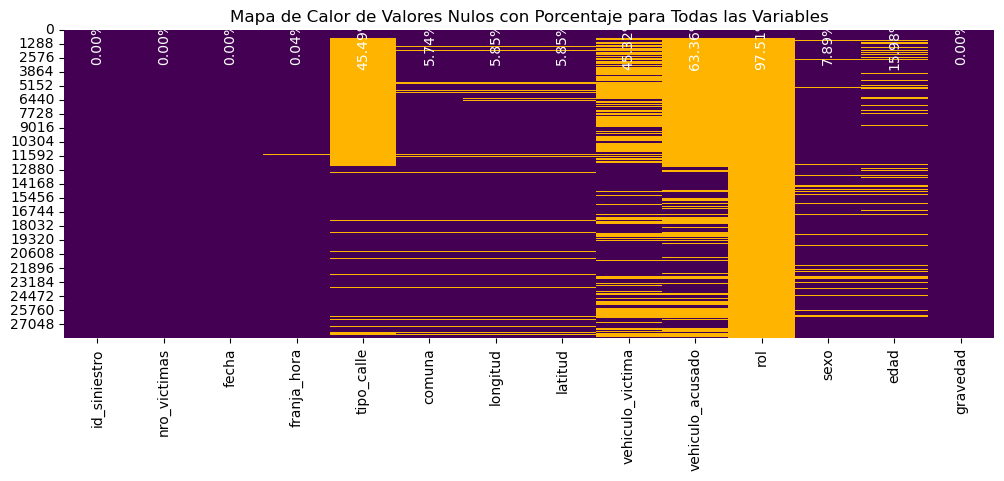

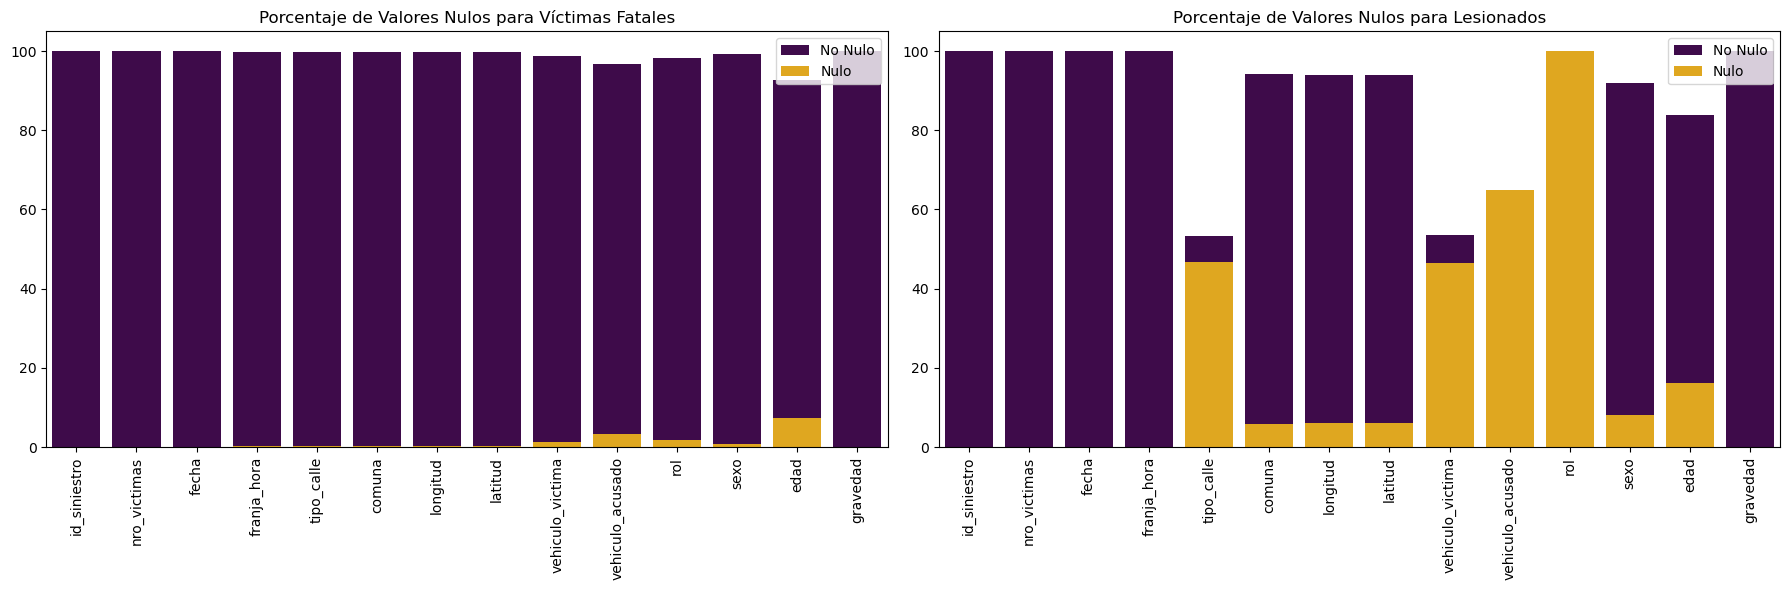

In [17]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = siniestros_df.isnull().mean() * 100

# Filtrar por víctimas fatales
fatal_df = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por lesionados (gravedad diferente de fatal)
lesionados_df = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Calcular el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos_fatal = fatal_df.isnull().mean() * 100

# Calcular el porcentaje de valores nulos por columna para lesionados
porcentaje_nulos_lesionados = lesionados_df.isnull().mean() * 100

# Crear una paleta de colores personalizada
cmap_custom = sns.color_palette(['#440154', '#FFB400'])



# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(12, 4))
sns.heatmap(siniestros_df.isnull(), cbar=False, cmap=cmap_custom)

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(siniestros_df.columns.get_loc(col) + 0.5, 1200, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()



# Configurar subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos_fatal.index, y=100 - porcentaje_nulos_fatal.values, color=cmap_custom[0], label='No Nulo', ax=axes[0])
sns.barplot(x=porcentaje_nulos_fatal.index, y=porcentaje_nulos_fatal.values, color=cmap_custom[1], label='Nulo', ax=axes[0])
axes[0].set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend()

# Segundo gráfico: Porcentaje de valores nulos para lesionados
sns.barplot(x=porcentaje_nulos_lesionados.index, y=100 - porcentaje_nulos_lesionados.values, color=cmap_custom[0], label='No Nulo', ax=axes[1])
sns.barplot(x=porcentaje_nulos_lesionados.index, y=porcentaje_nulos_lesionados.values, color=cmap_custom[1], label='Nulo', ax=axes[1])
axes[1].set_title('Porcentaje de Valores Nulos para Lesionados')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

En la sección **3. Exploración del Conjunto de Datos: 'homicidios_cleaned', 'lesiones_cleaned'**, llevamos a cabo un análisis exhaustivo de los valores faltantes. En resumen, cuando abordemos las columnas con una cantidad significativa de valores ausentes, nos enfocaremos únicamente en los datos de siniestros viales con víctimas fatales, excluyendo así aquellos relacionados con siniestros viales con lesionados.

## Tratar Duplicados

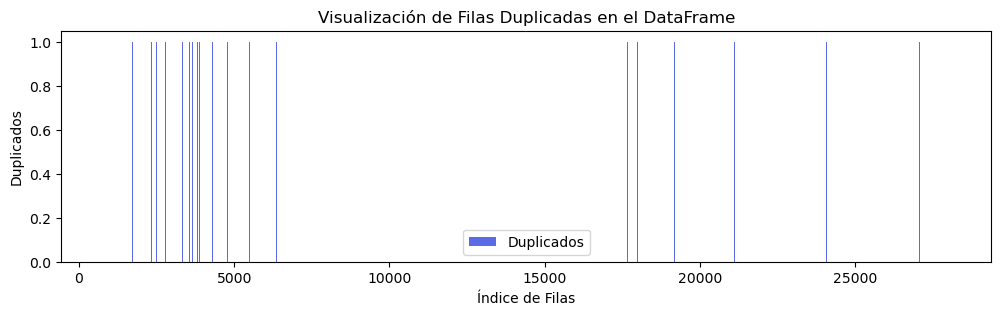

In [18]:
filas_duplicadas = siniestros_df[siniestros_df.duplicated()]

# Crear un gráfico de barras para mostrar la cantidad de duplicados en cada fila
plt.figure(figsize=(12, 3))
plt.bar(filas_duplicadas.index, height=1, color='#162CDB', linewidth=2, alpha=0.7, label='Duplicados')
plt.title('Visualización de Filas Duplicadas en el DataFrame')
plt.xlabel('Índice de Filas')
plt.ylabel('Duplicados')
plt.legend()
plt.show()

In [19]:
# Obtener filas duplicadas completas

filas_duplicadas = siniestros_df[siniestros_df.duplicated()]
print("\n\033[1mFilas duplicadas completas:")
filas_duplicadas


Filas duplicadas completas:


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
796,LC-2019-0006638,2,2019-01-04,9,NaN,10,-58.496239,-34.636075,moto,NaN,NaN,masculino,37,leve
812,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve
818,LC-2019-0008388,3,2019-01-04,20,NaN,15,-58.454242,-34.585794,NaN,NaN,NaN,femenino,<NA>,leve
835,LC-2019-0008860,3,2019-01-05,6,NaN,4,-58.412835,-34.655086,transporte publico,NaN,NaN,masculino,67,leve
848,LC-2019-0009807,2,2019-01-05,20,NaN,9,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40,leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve
27913,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve
27983,LC-2021-0631292,5,2021-12-19,12,calle,12,-58.484141,-34.552869,NaN,NaN,NaN,femenino,<NA>,grave
27986,LC-2021-0631295,6,2021-12-19,12,calle,8,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50,leve


In [20]:
# Consulta aleatoria para confirmar la duplicidad de registros

id_siniestro_consulta = "LC-2021-0633935"
consulta_resultados = siniestros_df[siniestros_df['id_siniestro'] == id_siniestro_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
28028,LC-2021-0633935,3,2021-12-20,18,calle,7,-58.458854,-34.627548,peaton,camioneta,NaN,NaN,<NA>,leve
28029,LC-2021-0633935,3,2021-12-20,18,calle,7,-58.458854,-34.627548,peaton,camioneta,NaN,NaN,<NA>,leve
28030,LC-2021-0633935,3,2021-12-20,18,calle,7,-58.458854,-34.627548,peaton,camioneta,NaN,femenino,35,leve


Al examinar los registros identificados como duplicados, se evidenció que correspondían a siniestros que involucraban más de una víctima en un mismo incidente. Para validar esta observación, se seleccionó aleatoriamente un 'id_siniestro' (LC-2021-0633935) y se confirmó que no se trataba de duplicados genuinos. Con el objetivo de normalizar los datos, se implementa la estrategia de introducir una nueva columna 'id_victima' que sirviera como identificador único para cada víctima en un siniestro. En otras palabras, se asignará un número secuencial a cada víctima dentro de un incidente para diferenciarlas.

In [21]:
# Crear una nueva columna para identificar a cada víctima

siniestros_df['id_victima'] = siniestros_df.groupby('id_siniestro').cumcount() + 1
print("\033[1mDataFrame con nueva columna 'id_victima':")
siniestros_df.head()

DataFrame con nueva columna 'id_victima':


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,fatal,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,fatal,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,fatal,1
3,2016-0004,1,2016-01-10,0,avenida,8,-58.46503904,-34.68092974,moto,NaN,conductor,masculino,18,fatal,1
4,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,fatal,1


In [22]:
# Conteo de duplicados para verificar nuevamente

duplicados_count = siniestros_df.duplicated().sum()
print(f"Total de registros duplicados en siniestro_df: {duplicados_count}")

Total de registros duplicados en siniestro_df: 0


In [23]:
# Almacenar el DataFrame unificado

siniestros_df.to_csv('siniestros_viales.csv', index=False)

### Análisis Descriptivo

Las estadísticas descriptivas, como la media, la mediana, la desviación estándar, los cuartiles, entre otros, son herramientas clave en este proceso. Proporcionan una visión cuantitativa de la distribución de los datos y ayudan a comprender la tendencia central, la dispersión y la forma de la distribución.

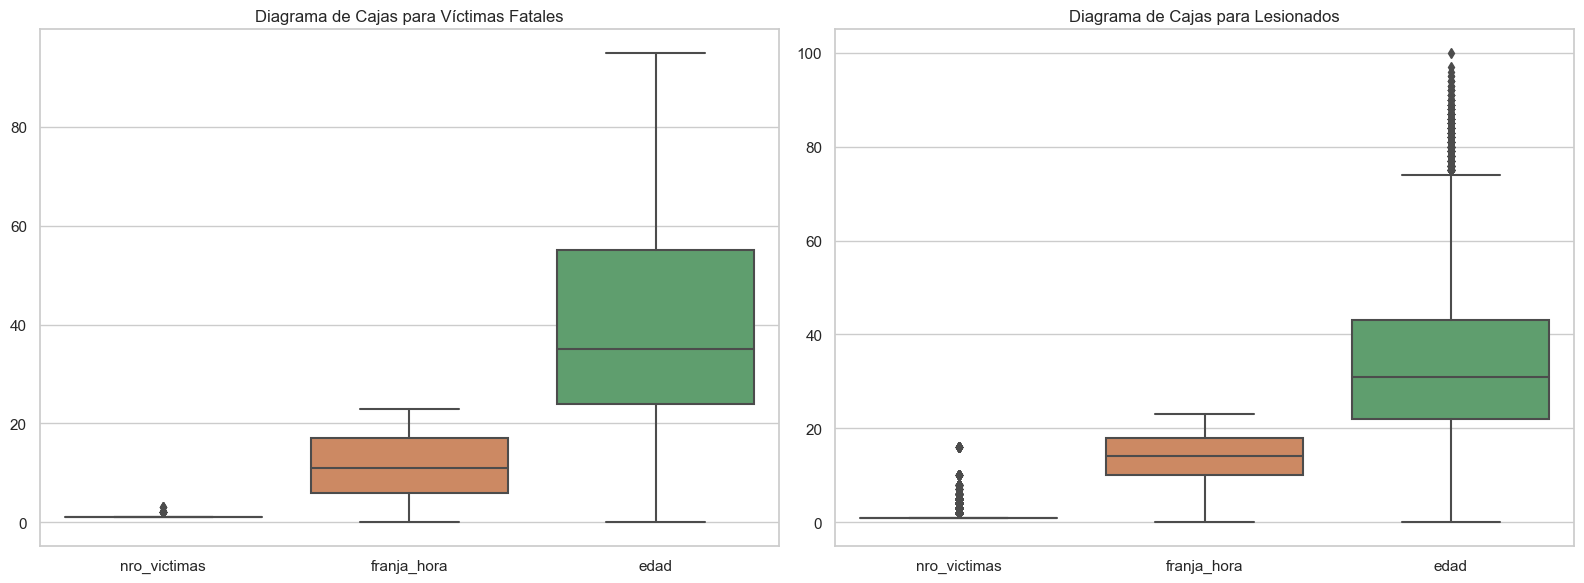

In [24]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

# Seleccionar columnas numéricas para el boxplot
columns_of_interest = ['nro_victimas', 'franja_hora', 'edad']

# Llenar los valores nulos con ceros para Víctimas Fatales
siniestros_fatal_filled = siniestros_fatal[columns_of_interest].fillna(0)

# Llenar los valores nulos con ceros para Lesionados
siniestros_lesionados_filled = siniestros_lesionados[columns_of_interest].fillna(0)

# Configurar la disposición de subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Crear un diagrama de cajas para Víctimas Fatales
sns.boxplot(data=siniestros_fatal_filled, ax=axes[0])
axes[0].set_title('Diagrama de Cajas para Víctimas Fatales')

# Crear un diagrama de cajas para Lesionados
sns.boxplot(data=siniestros_lesionados_filled, ax=axes[1])
axes[1].set_title('Diagrama de Cajas para Lesionados')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [25]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

# Descripción estadística para Víctimas Fatales
describe_fatal = siniestros_fatal.describe()

# Descripción estadística para Lesionados
describe_lesionados = siniestros_lesionados.describe()

# Imprimir los resultados con negrita (en un entorno compatible)
print("\033[1mEstadísticas para Víctimas Fatales:\033[0m")  # Esto funciona en algunos entornos
print(describe_fatal)

print("\n\033[1mEstadísticas para Lesionados:\033[0m")
print(describe_lesionados)

Estadísticas para Víctimas Fatales:
       nro_victimas  franja_hora       edad
count         719.0        718.0      666.0
mean       1.061196    11.559889  42.145646
std        0.256686     6.691543  19.764891
min             1.0          0.0        1.0
25%             1.0          6.0       27.0
50%             1.0         11.0       37.0
75%             1.0         17.0       56.0
max             3.0         23.0       95.0

Estadísticas para Lesionados:
       nro_victimas  franja_hora       edad
count       27597.0      27588.0    23126.0
mean        1.42251    13.546216   37.72572
std        1.087882     5.596658  15.217116
min             1.0          0.0        0.0
25%             1.0         10.0       27.0
50%             1.0         14.0       35.0
75%             1.0         18.0       46.0
max            16.0         23.0      100.0


Estadísticas para Víctimas Fatales:
- **nro_victimas:**
    - Count: 719 observaciones de Víctimas Fatales.
    - Media: 1.06, lo que sugiere que, en promedio, hay alrededor de 1 víctima fatal por siniestro.
    - Desviación Estándar: 0.26, indicando que la mayoría de los siniestros fatales tienen alrededor de 1 víctima, con poca variabilidad.
    - Mínimo: 1, que indica al menos 1 persona fallecida en el hecho.
    - Máximo: 3, indicando que hay casos donde se registraron hasta 3 víctimas fatales en un mismo siniestro.

- **franja_hora:**
    - Count: 718 observaciones.
    - Media: 11.56, sugiriendo que, en promedio, los siniestros fatales tienden a ocurrir alrededor de las 11:30 a.m.
    - Desviación Estándar: 6.69, indicando cierta variabilidad en la hora de ocurrencia.

- **edad:**
    - Count: 666 observaciones (algunas edades faltan).
    - Media: 42.15, lo que sugiere que la mayoría de las víctimas fatales tienen alrededor de 42 años.
    - Desviación Estándar: 19.76, indicando cierta variabilidad en las edades de las víctimas.


Estadísticas para Lesionados:
    
- **nro_victimas:**
    - Count: 27,597 observaciones de Lesionados.
    - Media: 1.42, sugiriendo que, en promedio, hay alrededor de 1.42 víctimas lesionadas por siniestro.
    - Desviación Estándar: 1.09, indicando una mayor variabilidad en el número de víctimas lesionadas en comparación con las víctimas fatales.
    - Mínimo: 1, que indica al menos 1 persona lesionada en el hecho.
    - Máximo: 16, indicando que hay casos donde se registraron hasta 16 víctimas lesionadas en un mismo siniestro.

- **franja_hora:**
    - Count: 27,588 observaciones.
    - Media: 13.55, indicando que, en promedio, los siniestros con lesionados tienden a ocurrir alrededor de las 1:30 p.m.
    - Desviación Estándar: 5.60, sugiriendo cierta variabilidad en la hora de ocurrencia.

- **edad:**
    - Count: 23,126 observaciones (algunas edades faltan).
    - Media: 37.73, indicando que la mayoría de los lesionados tienen alrededor de 38 años.
    - Desviación Estándar: 15.22, indicando cierta variabilidad en las edades de los lesionados.

Análisis General:

En términos generales, observamos que los siniestros con víctimas fatales tienden a tener, en promedio, alrededor de 1 víctima, con poca variabilidad en este número. La hora de ocurrencia muestra cierta consistencia alrededor de las 11:30 a.m. y las edades de las víctimas fatales tienden a distribuirse alrededor de los 42 años.

En contraste, los siniestros con lesionados presentan una mayor variabilidad en el número de víctimas, con casos que van desde 1 hasta 16. Estos siniestros, en promedio, ocurren alrededor de la 1:30 p.m., y las edades de los lesionados se distribuyen alrededor de los 38 años, también con una variabilidad considerable.

La relación general entre estas variables sugiere que los siniestros fatales tienden a ser menos numerosos pero más consistentes en términos de víctimas y horario de ocurrencia, mientras que los siniestros con lesionados muestran mayor variabilidad en estas métricas. Este análisis proporciona una visión detallada de la dinámica de los siniestros viales en Buenos Aires y puede ser clave para desarrollar estrategias de prevención y respuesta efectivas.

### Análisis de Distribuciones Univariables

En este paso, nos centramos en comprender la forma y la naturaleza de la distribución de cada variable individual en nuestro conjunto de datos. Esto implica examinar la frecuencia y la variabilidad de los valores en cada columna. Cada gráfico proporciona información valiosa sobre cómo se distribuyen los datos y puede orientar decisiones sobre manipulaciones adicionales, como transformaciones o segmentación de datos, según sea necesario.

**Siniestros por año**

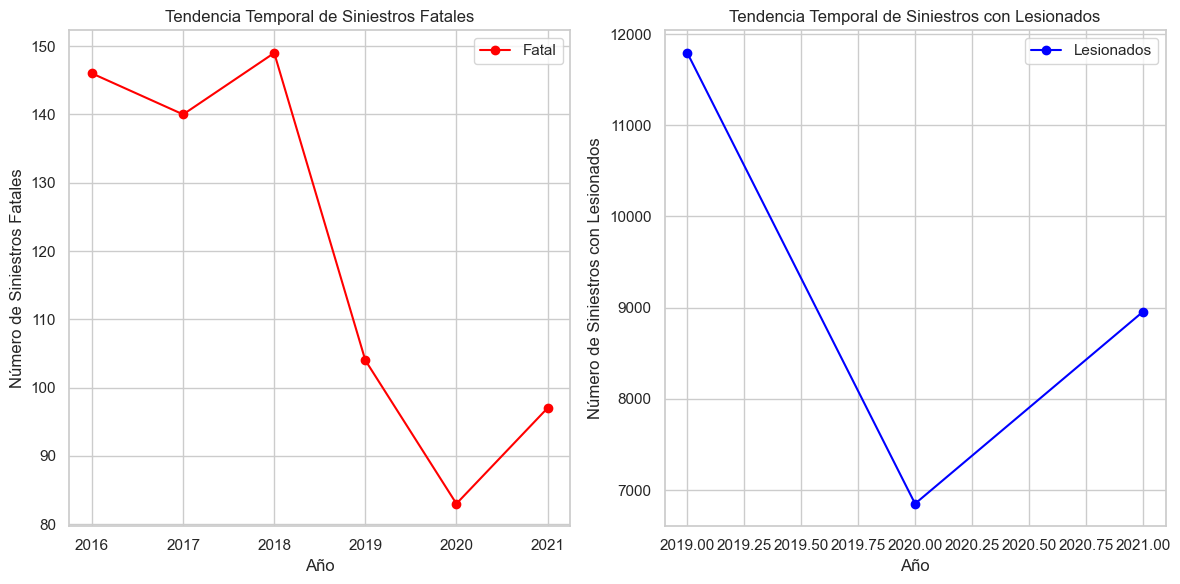

In [51]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Convertir la columna de fecha a tipo datetime si aún no está en ese formato
siniestros_fatal['fecha'] = pd.to_datetime(siniestros_fatal['fecha'])
siniestros_lesionados['fecha'] = pd.to_datetime(siniestros_lesionados['fecha'])

# Truncar las fechas al año para evitar decimales
siniestros_lesionados['anio'] = siniestros_lesionados['fecha'].dt.year

# Agrupar por año y contar el número de siniestros en cada año
siniestros_fatal_por_anio = siniestros_fatal.groupby(siniestros_fatal['fecha'].dt.year).size()
siniestros_lesionados_por_anio = siniestros_lesionados.groupby('anio').size()

# Crear dos gráficos diferentes
plt.figure(figsize=(12, 6))

# Primer gráfico para siniestros fatales
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_anio.index, siniestros_fatal_por_anio, label='Fatal', marker='o', color='red')
plt.title('Tendencia Temporal de Siniestros Fatales')
plt.xlabel('Año')
plt.ylabel('Número de Siniestros Fatales')
plt.legend()
plt.grid(True)

# Segundo gráfico para siniestros con víctimas lesionadas
plt.subplot(1, 2, 2)
plt.plot(siniestros_lesionados_por_anio.index, siniestros_lesionados_por_anio, label='Lesionados', marker='o', color='blue')
plt.title('Tendencia Temporal de Siniestros con Lesionados')
plt.xlabel('Año')
plt.ylabel('Número de Siniestros con Lesionados')
plt.legend()
plt.grid(True)

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

**Siniestros por Franja Horaria**

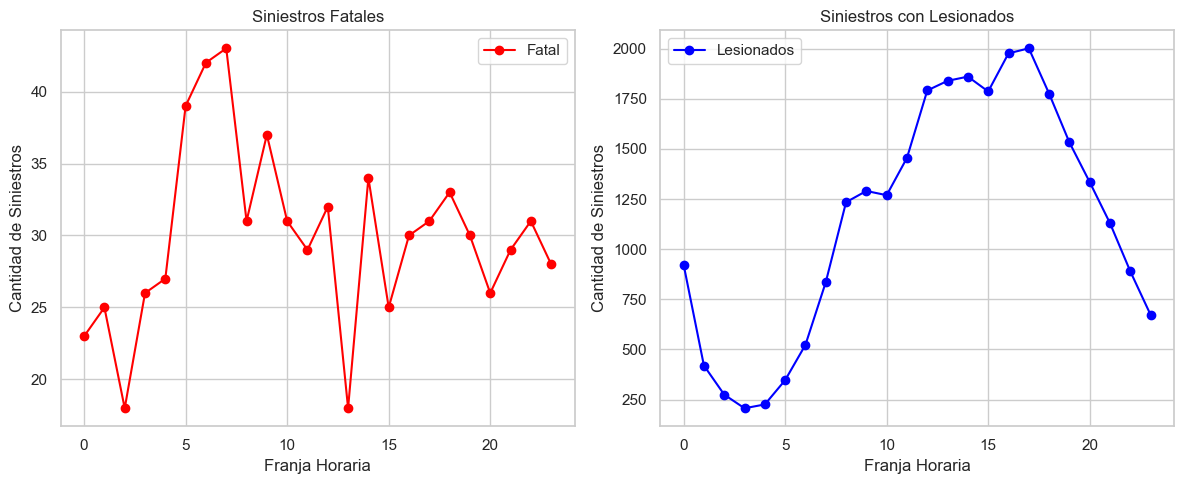

In [83]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].dropna(subset=['franja_hora'])

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].dropna(subset=['franja_hora'])

# Obtener la lista completa de franjas horarias (unión de ambas categorías)
franjas_horarias = np.union1d(siniestros_fatal['franja_hora'].unique(), siniestros_lesionados['franja_hora'].unique())

# Agrupar y contar la cantidad de siniestros en cada categoría para cada franja horaria
fatal_por_horario = siniestros_fatal.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)
lesionados_por_horario = siniestros_lesionados.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)

# Configurar la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar la línea para siniestros fatales
axes[0].plot(franjas_horarias, fatal_por_horario, label='Fatal', color='red', marker='o')
axes[0].set_title('Siniestros Fatales')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Siniestros')
axes[0].legend()
axes[0].grid(True)

# Graficar la línea para siniestros con víctimas lesionadas
axes[1].plot(franjas_horarias, lesionados_por_horario, label='Lesionados', color='blue', marker='o')
axes[1].set_title('Siniestros con Lesionados')
axes[1].set_xlabel('Franja Horaria')
axes[1].set_ylabel('Cantidad de Siniestros')
axes[1].legend()
axes[1].grid(True)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [ ]:

#*** 4. Tipo de Calle
plt.figure(figsize=(12, 6))
sns.countplot(data=siniestros_df, x='tipo_calle', hue='gravedad')
plt.title('Distribución de Siniestros por Tipo de Calle y Gravedad')
plt.xlabel('Tipo de Calle')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

#*** 5. Comuna
plt.figure(figsize=(14, 6))
sns.countplot(data=siniestros_df, x='comuna', hue='gravedad')
plt.title('Distribución de Siniestros por Comuna y Gravedad')
plt.xlabel('Comuna')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

# 6. Longitud y Latitud
plt.figure(figsize=(12, 8))
sns.scatterplot(data=siniestros_df, x='longitud', y='latitud', hue='gravedad', palette='viridis')
plt.title('Distribución Geográfica de Siniestros por Gravedad')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Gravedad')
plt.show()

#*** 7. Tipo de Vehículo de la Víctima
plt.figure(figsize=(12, 6))
sns.countplot(data=siniestros_df, x='vehiculo_victima', hue='gravedad')
plt.title('Distribución de Siniestros por Tipo de Vehículo de la Víctima y Gravedad')
plt.xlabel('Tipo de Vehículo de la Víctima')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

#*** 8. Tipo de Vehículo Acusado
plt.figure(figsize=(12, 6))
sns.countplot(data=siniestros_df, x='vehiculo_acusado', hue='gravedad')
plt.title('Distribución de Siniestros por Tipo de Vehículo Acusado y Gravedad')
plt.xlabel('Tipo de Vehículo Acusado')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

#*** 9. Rol
plt.figure(figsize=(12, 6))
sns.countplot(data=siniestros_df, x='rol', hue='gravedad')
plt.title('Distribución de Siniestros por Rol y Gravedad')
plt.xlabel('Rol')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

#*** 10. Género
plt.figure(figsize=(10, 6))
sns.countplot(data=siniestros_df, x='sexo', hue='gravedad')
plt.title('Distribución de Siniestros por Género y Gravedad')
plt.xlabel('Género')
plt.ylabel('Conteo de Siniestros')
plt.legend(title='Gravedad')
plt.show()

#*** 11. Edad
plt.figure(figsize=(10, 6))
sns.histplot(data=siniestros_df, x='edad', bins=20, kde=True, hue='gravedad')
plt.title('Distribución de Edades en Siniestros por Gravedad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Gravedad')
plt.show()

# 12. Gravedad del Siniestro
plt.figure(figsize=(8, 6))
sns.countplot(data=siniestros_df, x='gravedad')
plt.title('Distribución de Gravedad en Siniestros')
plt.xlabel('Gravedad')
plt.ylabel('Conteo de Siniestros')
plt.show()


In [ ]:
Crea gráficos relevantes para el análisis (histogramas, gráficos de barras, etc.) para comprender mejor la distribución de los datos.

In [ ]:
# Histograma de Edades en Hechos
plt.hist(siniestros_df["EDAD"], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Edades en Hechos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
Conclusiones y Documentación:

In [ ]:
Añade celdas de Markdown para documentar tus análisis, decisiones y conclusiones. Justifica cualquier acción tomada.

In [ ]:
## Conclusiones EDA:

- Se identificaron y eliminaron duplicados en los conjuntos de datos.
- Se realizó un análisis de valores nulos y se tomaron decisiones sobre cómo manejarlos.
- Se visualizaron gráficos de outliers y distribuciones para entender mejor la naturaleza de los datos.
- ...



In [ ]:
siniestros_df

In [ ]:
Identificación de Patrones:
Utiliza gráficos y estadísticas para identificar patrones en los datos. Puedes utilizar gráficos de dispersión, histogramas y tablas de contingencia.
python
Copy code
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión para edad y número de víctimas
sns.scatterplot(x='edad', y='nro_victimas', data=merged_df)
plt.title('Relación entre Edad y Número de Víctimas')
plt.show()

In [ ]:
 Análisis de Áreas Críticas:
Examina las áreas geográficas (comuna, longitud, latitud) para identificar áreas críticas.
python
Copy code
# Gráfico de ubicación geográfica
sns.scatterplot(x='longitud', y='latitud', hue='comuna', data=merged_df)
plt.title('Ubicación Geográfica por Comuna')
plt.show()

In [ ]:
Seguimiento Temporal:
Realiza un análisis temporal para identificar patrones a lo largo del tiempo.
python
Copy code
# Convertir la columna fecha a tipo datetime
merged_df['fecha'] = pd.to_datetime(merged_df['fecha'])

# Gráfico de tendencia temporal
sns.lineplot(x='fecha', y='nro_victimas', data=merged_df)
plt.title('Tendencia Temporal de Número de Víctimas')
plt.show()

In [ ]:
Análisis Específico:
Analiza las circunstancias específicas de los incidentes, como el tipo de calle, para identificar factores de riesgo.
python
Copy code
# Análisis por tipo de calle
sns.countplot(x='tipo_calle', data=merged_df)
plt.title('Distribución de Incidentes por Tipo de Calle')
plt.show()

In [ ]:
Identificación de Grupos de Riesgo:
Identifica grupos de riesgo mediante análisis por género, rol y otras variables relevantes.
python
Copy code
# Análisis por rol y sexo
sns.countplot(x='rol', hue='sexo', data=merged_df)
plt.title('Distribución de Incidentes por Rol y Sexo')
plt.show()

In [ ]:
import pandas as pd

# Paso 1: Calcular la tasa de homicidios para el último semestre
ultimo_semestre = h_hechos_dfcleaned[h_hechos_dfcleaned['fecha'] >= '2022-06-01']
homicidios_ultimo_semestre = ultimo_semestre['nro_victimas'].sum()
poblacion_ultimo_semestre = ultimo_semestre['Poblacion_Total'].iloc[0]  # Supongo que la población es constante para todo el semestre

tasa_ultimo_semestre = (homicidios_ultimo_semestre / poblacion_ultimo_semestre) * 100000

# Paso 2: Calcular la tasa de homicidios para el semestre anterior
semestre_anterior = h_hechos_dfcleaned[(h_hechos_dfcleaned['fecha'] >= '2022-01-01') & (h_hechos_dfcleaned['fecha'] < '2022-06-01')]
homicidios_semestre_anterior = semestre_anterior['nro_victimas'].sum()
poblacion_semestre_anterior = semestre_anterior['Poblacion_Total'].iloc[0]

tasa_semestre_anterior = (homicidios_semestre_anterior / poblacion_semestre_anterior) * 100000

# Paso 3: Calcular la reducción porcentual
reduccion_porcentual = ((tasa_semestre_anterior - tasa_ultimo_semestre) / tasa_semestre_anterior) * 100

# Imprimir resultados
print(f"Tasa de homicidios del último semestre: {tasa_ultimo_semestre:.2f} por 100,000 habitantes")
print(f"Tasa de homicidios del semestre anterior: {tasa_semestre_anterior:.2f} por 100,000 habitantes")
print(f"Reducción porcentual: {reduccion_porcentual:.2f}%")
